<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day_11_CNN_CIFAR10_Classifier_Cleaned/notebooks/Day11_CNN_CIFAR10_Classifier_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔢 Day 11: CNN for Image Classification (CIFAR-10 Dataset)

In this notebook, we'll build a **Convolutional Neural Network (CNN)** using Keras to classify images from the **CIFAR-10** dataset.

### Objectives:
- Load the CIFAR-10 dataset
- Preprocess and visualize the data
- Build and train a CNN
- Evaluate performance
- Visualize training curves and predictions

In [18]:
# 📦 Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import Input

In [2]:
# 📥 Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


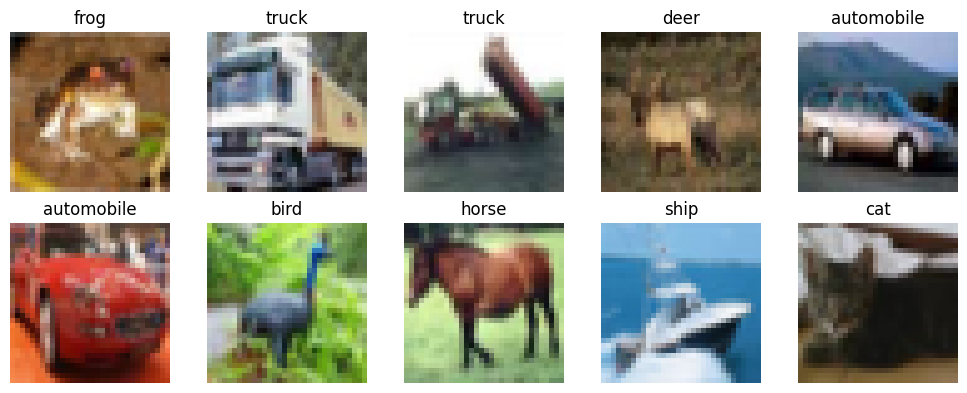

In [16]:
# 🖼️ Visualize Some Images
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].item()])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
# 🧠 Build CNN Model (Cleaned-up version)
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 🏋️ Train the Model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 71s 97ms/step - accuracy: 0.2807 - loss: 1.9218 - val_accuracy: 0.5060 - val_loss: 1.3584
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.4894 - loss: 1.4229 - val_accuracy: 0.5834 - val_loss: 1.1594
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 90ms/step - accuracy: 0.5573 - loss: 1.2470 - val_accuracy: 0.6264 - val_loss: 1.0499
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.6052 - loss: 1.1349 - val_accuracy: 0.6740 - val_loss: 0.9493
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.6416 - loss: 1.0240 - val_accuracy: 0.6870 - val_loss: 0.8949
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.6700 - loss: 0.9523 - val_accuracy: 0.6908 - val_loss: 0.8784
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6903 - loss: 0.8922 - val_accuracy: 0.7062 - val_loss: 0.8386
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 86s 93ms/step - accuracy: 0.7076 - loss: 0.8460 - 

In [6]:
# 📈 Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7185 - loss: 0.8127
Test Accuracy: 0.7168


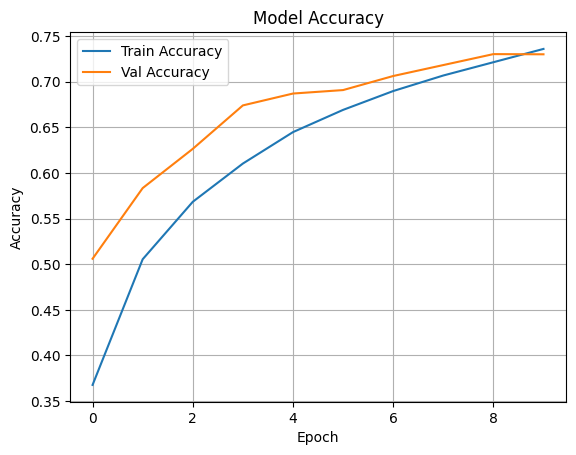

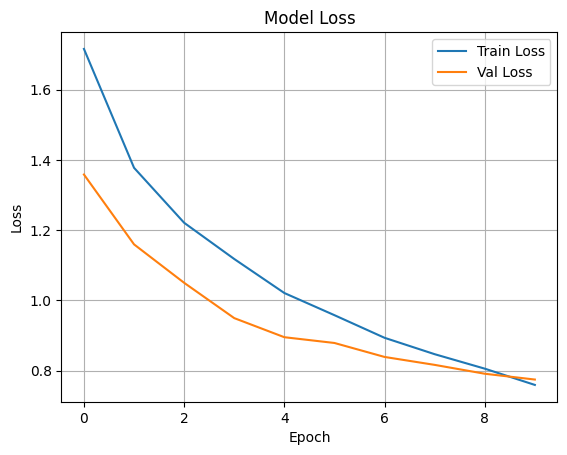

In [15]:
# 📊 Plot Accuracy and Loss
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("training_accuracy_loss_curve.png")
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [14]:
# Save same figure to same file (can combine plots too)
plt.savefig("training_accuracy_loss_curve.png")  # Overwrites previous if needed
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
# 🔮 Make Predictions and Visualize
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


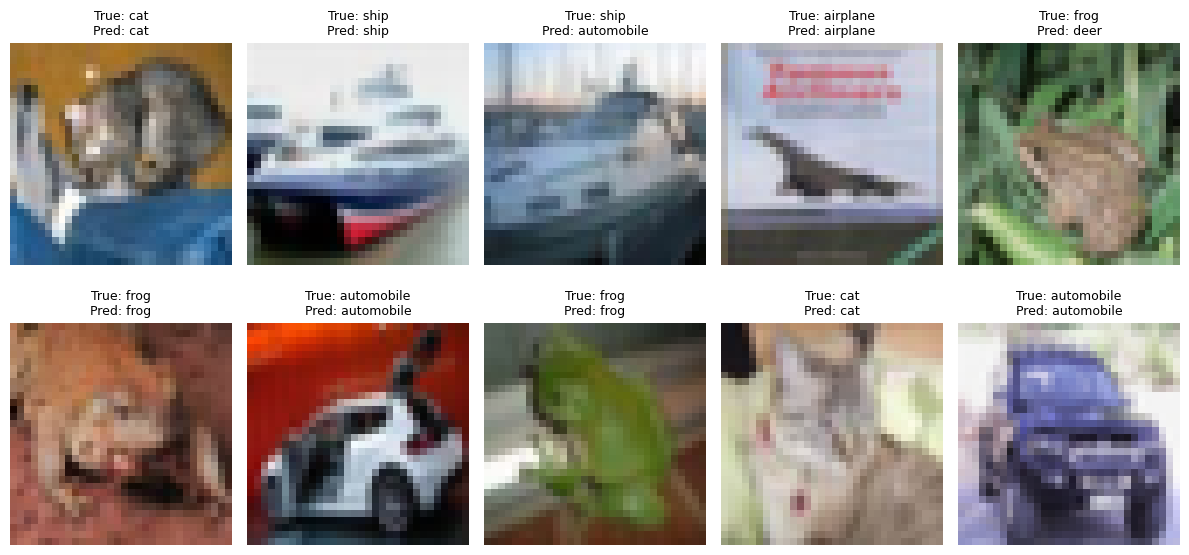

In [20]:
# 🖼️ Display Predictions on Test Images
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    true_label = class_names[y_test[i][0]]  # <-- Fix here
    pred_label = class_names[y_pred_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.savefig("cifar10_predictions_grid.png")
plt.show()